In [154]:
import numpy as np;
import seaborn as sns;
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 5]

In [155]:
random_avg = pd.read_csv("result-increasing-randoms-avg.txt")
threads_avg = pd.read_csv("result-increasing-threads-avg.txt")
threads_max = pd.read_csv("result-increasing-threads-max.txt")

In [156]:
def get_keys(data):
    col = list(data.columns[2:])
    res = []
    for i in col:
        res.append(i.split("[")[0])
    return set(res)

def get_average(data):
    col = list(data.columns)
    for i in range(2, len(col), 2):
        name = col[i].split("[")[0]+"[avg (s)]"
        #print("Averaging {} and {}".format(col[i], col[i+1]))
        data[name] = data.iloc[:,i:i+2].mean(axis=1)
    return data

In [157]:
threads_max = get_average(threads_max)
threads_avg = get_average(threads_avg)
random_avg = get_average(random_avg)

In [161]:
def errorfill(x, y, y_min, y_max, color=None, alpha_fill=0.3, ax=None, label=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = next(ax._get_lines.prop_cycler)['color']
    #ax.scatter(x, y, color=color)
    ax.semilogx(x, y, basex = 2, color=color, label=label)
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.legend()
    ax.fill_between(x, y_max, y_min, color=color, alpha=alpha_fill)

In [162]:
keys = get_keys(threads_max)
no_chunking = []
for i in keys:
    if "(chunking)" not in i:
        no_chunking.append(i)

<IPython.core.display.Javascript object>


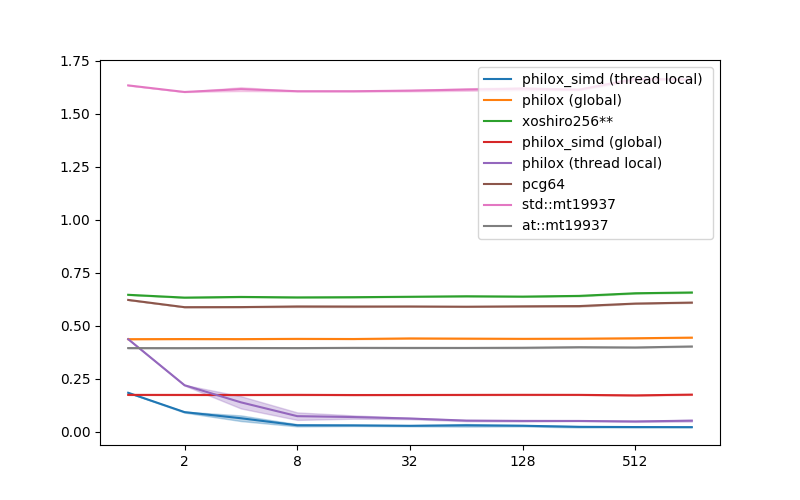

In [163]:
for i in no_chunking:
    x = threads_max["Number of Threads"]
    y = threads_max[i+"[avg (s)]"]
    y_min = threads_max[i+"[best max (s)]"]
    y_max = threads_max[i+"[worst max (s)]"]
    errorfill(x, y, y_min, y_max, label=i)

plt.show()